In [1]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [2]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

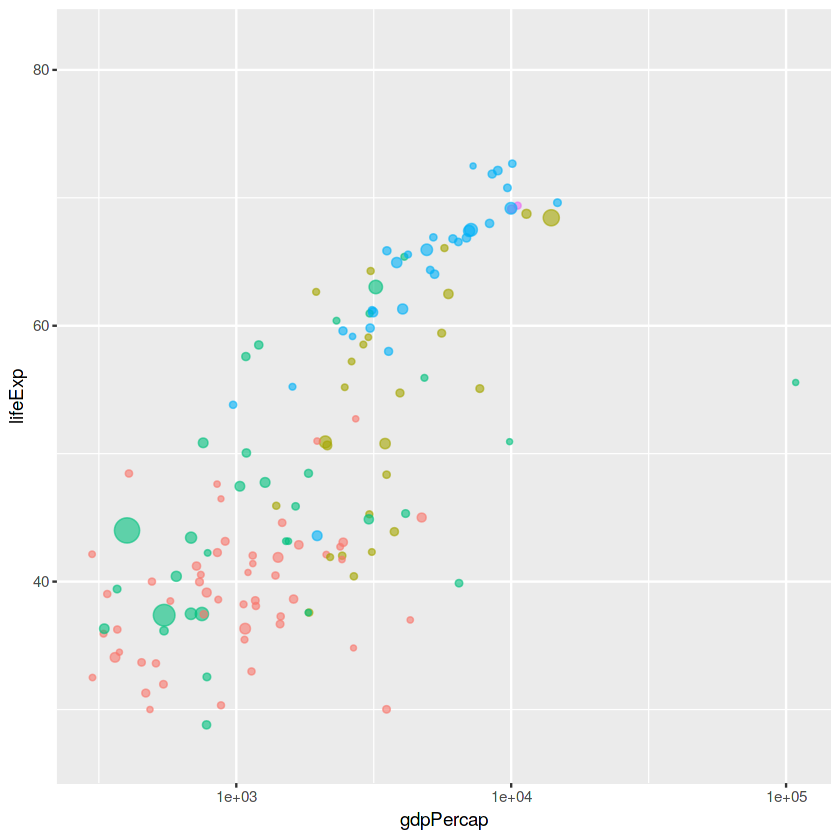

In [3]:
p = ggplot(df.1952, aes(x=gdpPercap, y=lifeExp, color = continent, size = pop)) + geom_point(alpha =0.6, show.legend=FALSE)
p = p + scale_x_log10() 
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
p = p + ylim(c(27, 82))
p

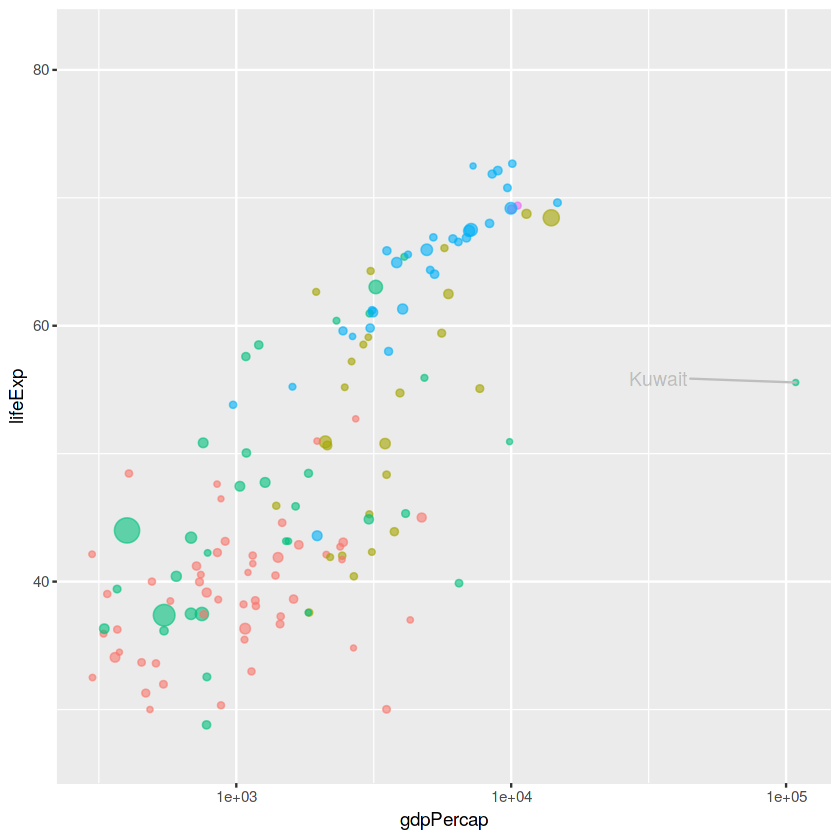

In [4]:
p = p + geom_text_repel(data = df.1952.kuwait,
                        aes(x=gdpPercap, y=lifeExp, label = country), 
                        segment.color = 'grey',
                        segment.size = 0.5,
                        color = 'grey', size = 4, nudge_x = -0.5, nudge_y = 0.3, show.legend = FALSE)
p

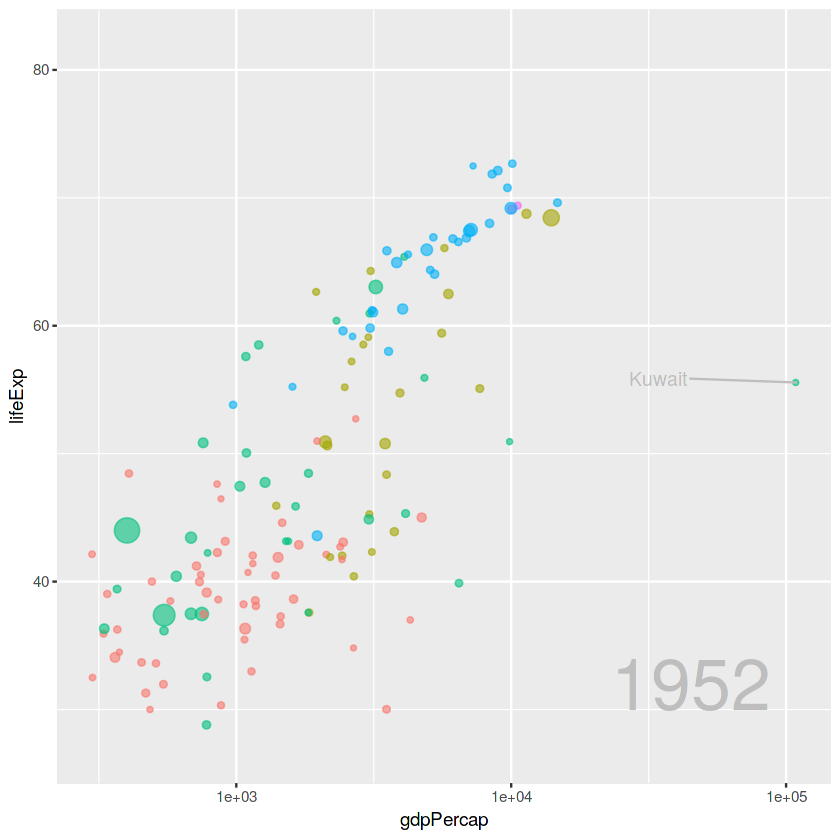

In [5]:
p = p + annotate("text", x = 4.5e+04, y = 32, label = "1952", color='grey', size = 15)
p

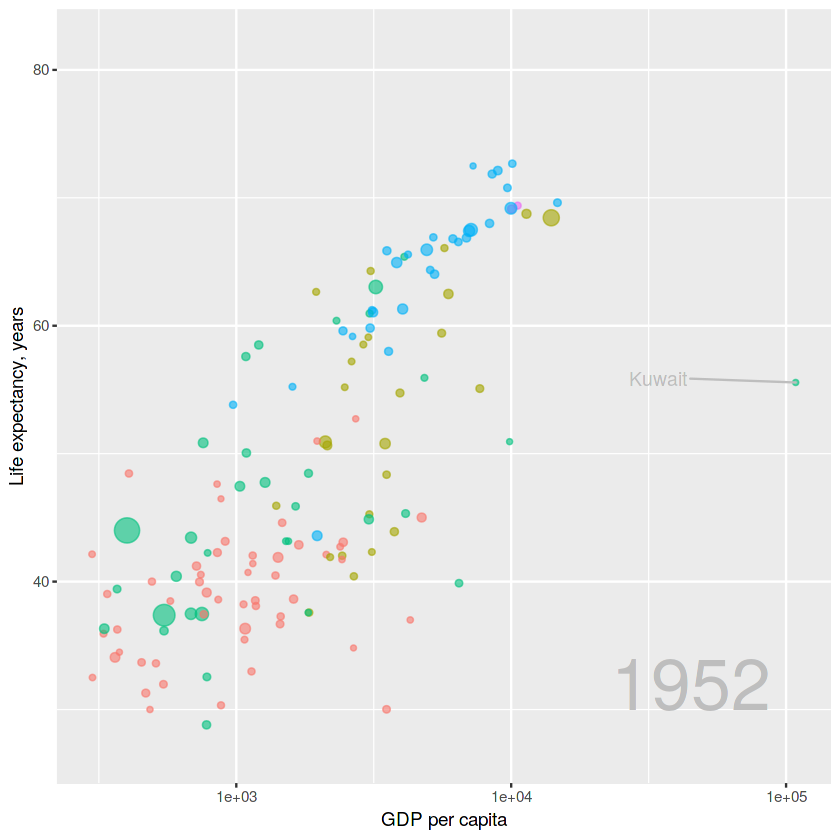

In [6]:
p = p + xlab("GDP per capita") + ylab("Life expectancy, years")+labs(size="Population size", color="Continent")
p

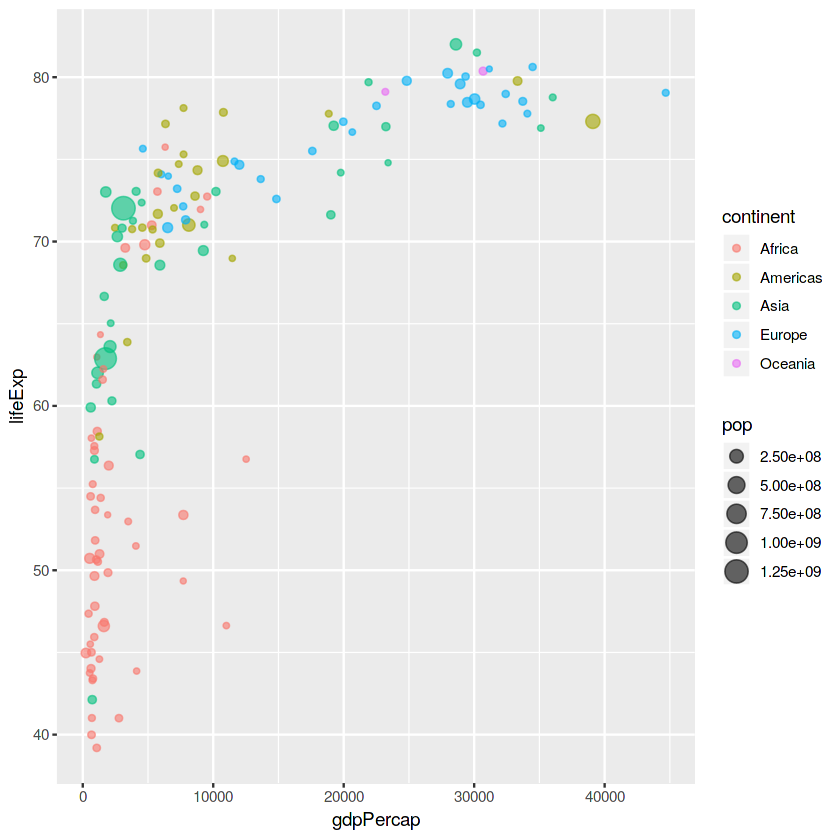

In [7]:
q = ggplot(df.2002, aes(x=gdpPercap, y=lifeExp, color = continent, size = pop)) + geom_point(alpha =0.6)

q

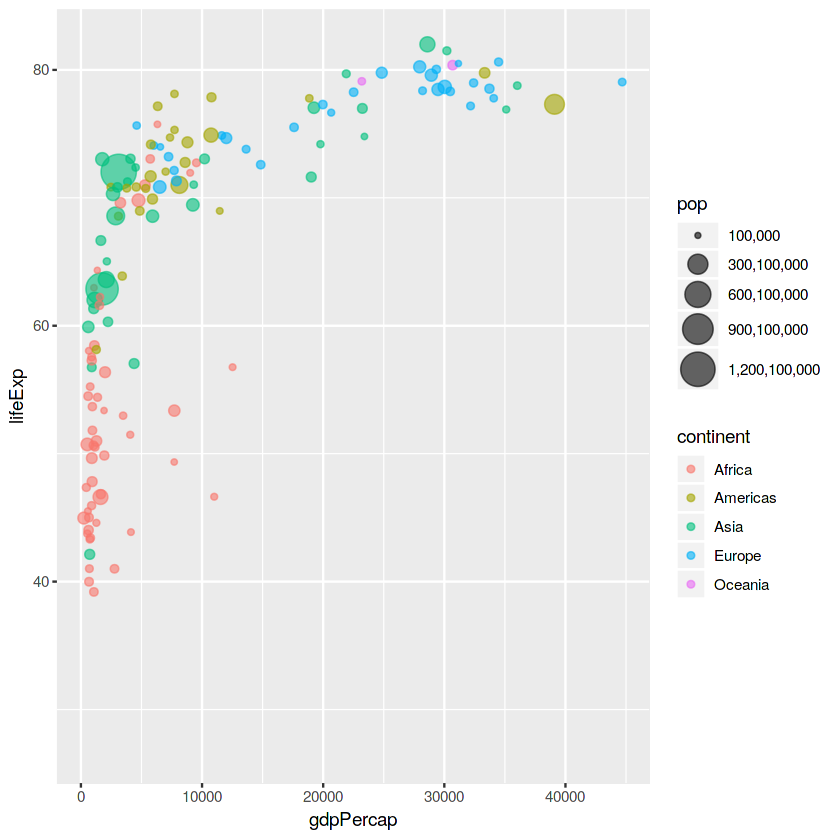

In [8]:
q = q + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

q = q + ylim(c(27, 82))

q

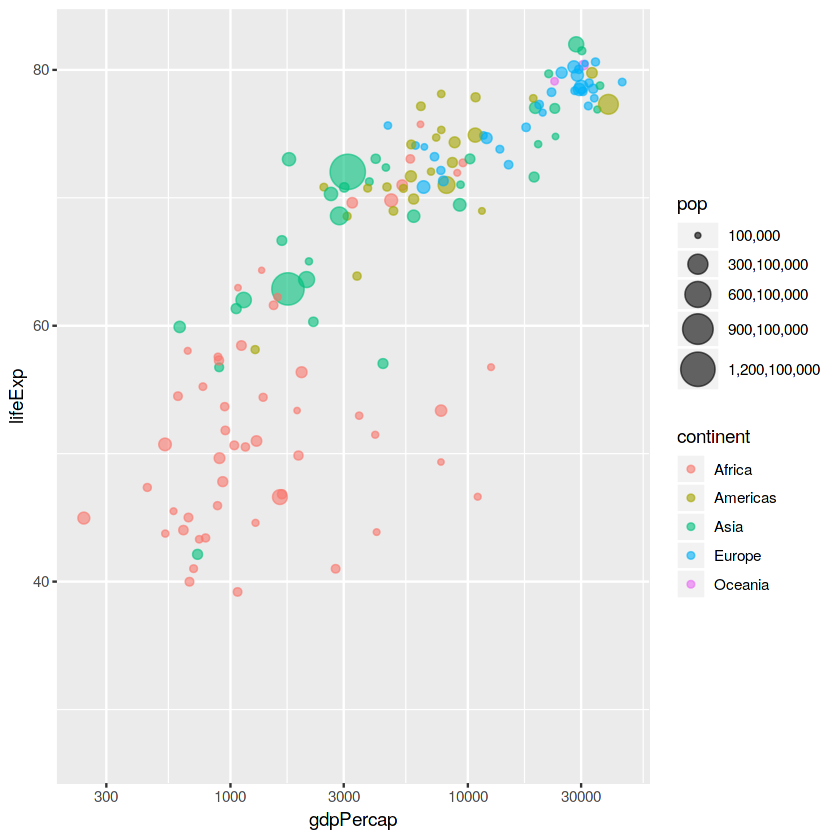

In [9]:
q = q + scale_x_log10() 
q

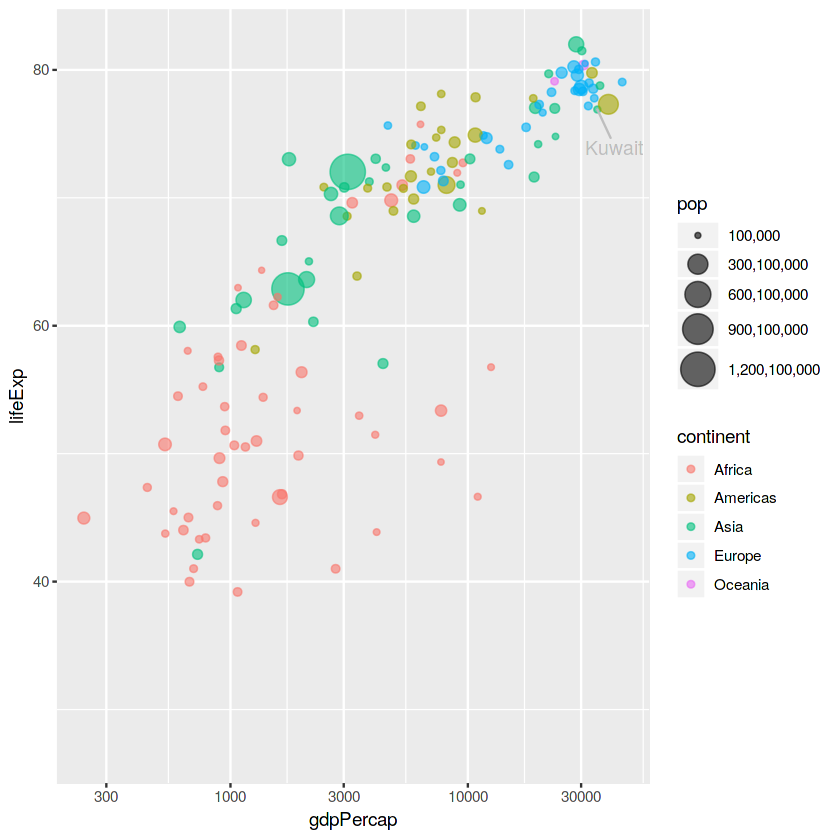

In [10]:
q = q + geom_text_repel(data = df.2002.kuwait,
                        aes(x=gdpPercap, y=lifeExp, label = country), 
                        segment.color = 'grey',
                        segment.size = 0.5,
                        color = 'grey', size = 4, nudge_x = 0.2, nudge_y = -3, show.legend = FALSE)
q

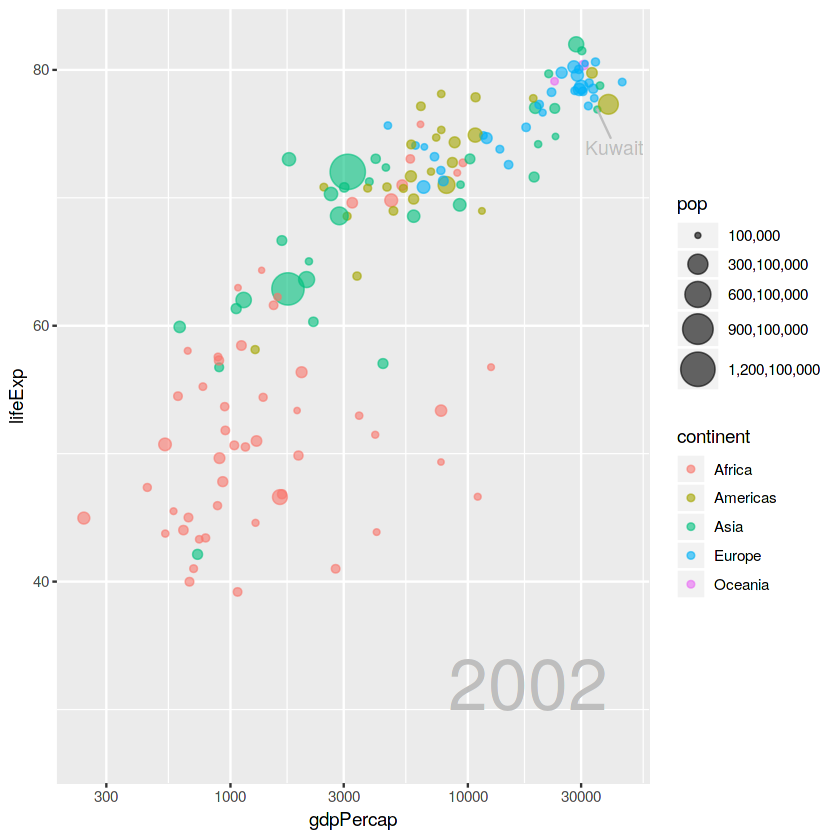

In [11]:
q = q + annotate("text", x = 18000, y = 32, label = "2002", color='grey', size = 15)
q

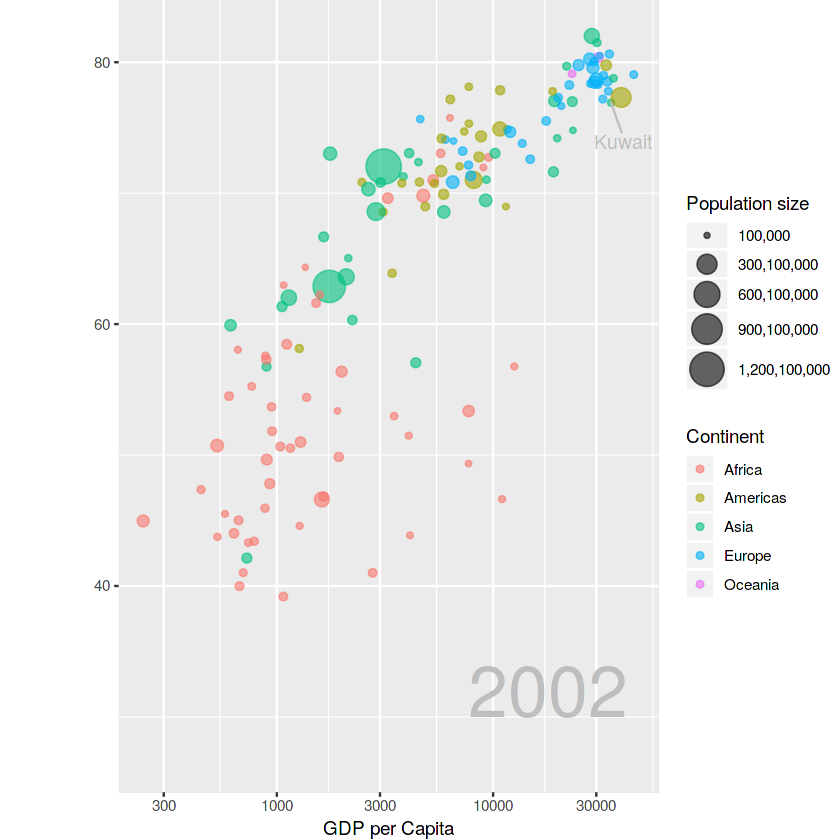

In [12]:
q = q + xlab("GDP per Capita")+labs(size="Population size", color="Continent")+
theme(axis.title.y=element_blank(),plot.margin = margin(0, 0, 0, 2, "cm"))
q

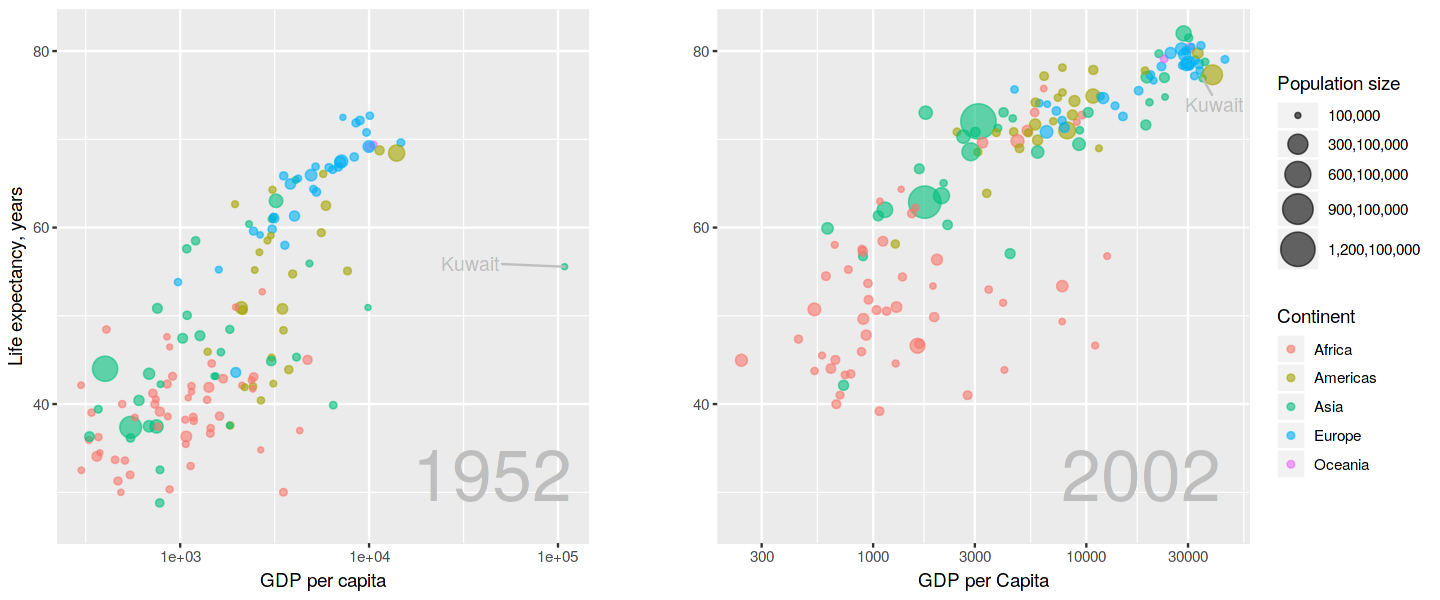

In [13]:
options(repr.plot.width=12, repr.plot.height=5)

p + q

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!